<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/Creating_Custom_Layers_and_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.19
!pip install pydot graphviz

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

In [6]:
# Define a custom dense layer with 32 units and ReLU activation.

class CustomDenseLayer(Layer):
  def __init__(self,units=32):
    super(), self.__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='zeros',
                             trainaible=True)

  def call(self, input):
    return tf.n.relu(tf.matmul(inputs, self.w) + self.b)


In [8]:
# Create a Keras model using the custom layer

# Define the model with Softmax in the output layer

model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()                # Output layer with Softmax activation for multi-class classification
])


In [10]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show the parameters
model.build((1000,20))
print("\nModel Summary after building:")
model.summary()

Model summary before building:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_2            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_3            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model Summary after building:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_2            │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_3            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model

import numpy as np

# Generate Random Data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(10, size=(1000,1))

# Convert labelsto categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3024
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2974
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2965
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2954
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2972
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2933
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2876
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2833
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2853
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2877


In [15]:
# Generate random test data
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

# Convert labels to categorical one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3019  
Test loss: 2.2976596355438232


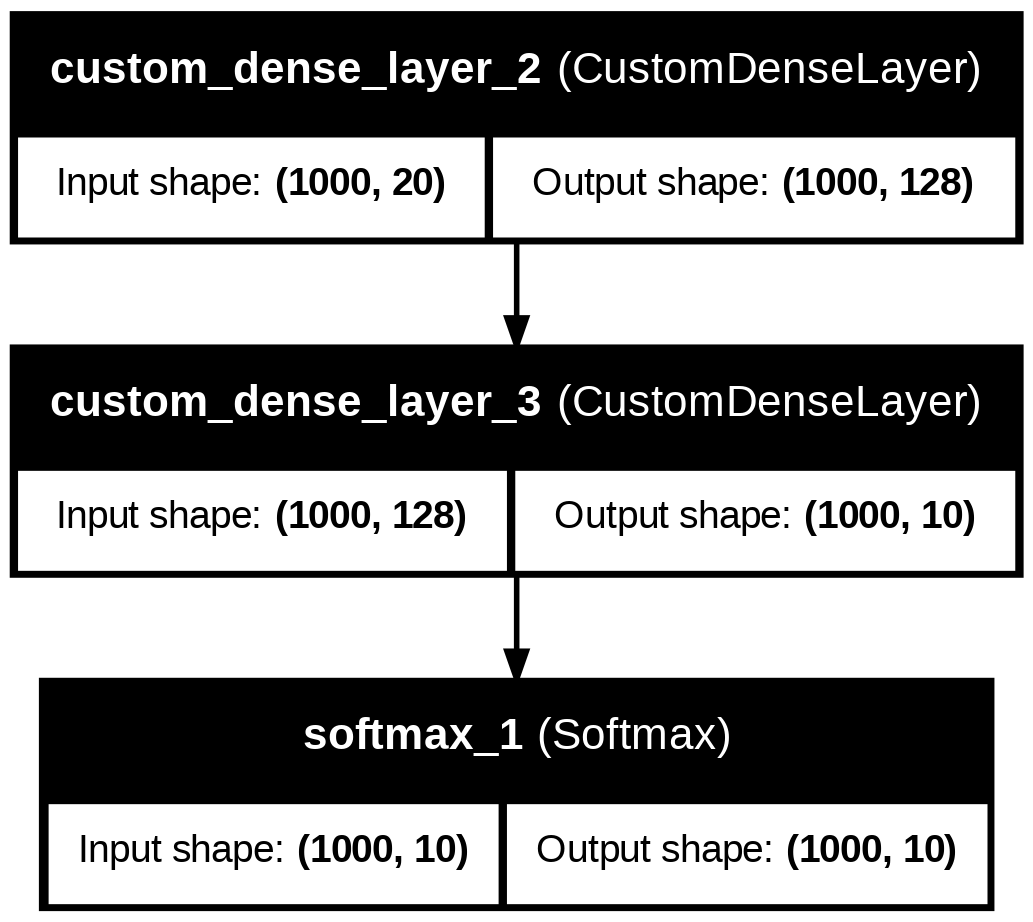

In [18]:
from tensorflow.keras.utils import plot_model

# Visualize Model Architecture
plot_model(model, to_file = 'model_architecture.png', show_shapes=True, show_layer_names=True)

In [20]:
from tensorflow.keras.layers import Dropout

# Modify the model to include a Dropout layer

model = Sequential([
    CustomDenseLayer(64),
    Dropout(0.5),
    CustomDenseLayer(10)
])

# Recompile the model

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.5724
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6408
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4333
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5086
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2619
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4369
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3578
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3730
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3135
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3010


In [26]:
class CustomDenseLayer(Layer):
  def __init__(self,units=128):
    super(CustomDenseLayer, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='zeros',
                             trainable=True)

  def call(self, input):
    return tf.nn.relu(tf.matmul(input, self.w) + self.b)

# Integrate the new custom layer into a model
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10)
])

# Recompile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Train the model again
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.4798
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6688
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2148
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6544
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3354
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8572
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3482
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5007
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3446
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4970


In [27]:
# Generate random test data
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

# Convert labels to categorical one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8371 
Test loss: 7.919736862182617
